In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Again start by downloading the neccessary data into the Colab Instance

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [2]:
import os
import zipfile
'''
local_zip = './datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/validation-horse-or-human')
zip_ref.close()
'''

"\nlocal_zip = './datasets/horse-or-human.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./datasets/horse-or-human')\nlocal_zip = '/tmp/validation-horse-or-human.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./datasets/validation-horse-or-human')\nzip_ref.close()\n"

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./datasets/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('./datasets/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('./datasets/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('./datasets/validation-horse-or-human/humans')

train_horse_names = os.listdir('./datasets/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('./datasets/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('./datasets/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('./datasets/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [4]:
import tensorflow as tf

## Then again define your model and optimizer

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-05-11 12:00:54.524574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-11 12:00:54.524723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       7

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Now when we organize the data into Generators note how we use many more kinds of Data Augmentation!

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented wiht the full list of augmentation techniques below
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './datasets/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        './datasets/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')


Found 1028 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model with the new augmented data
Since we now have more data due to the data augmentation this training process will take a bit longer than the last time. However, you'll find that the results are much better!

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/100


2022-05-11 12:00:56.483308: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-11 12:00:56.812362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6941 - acc: 0.5137

2022-05-11 12:01:10.112466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 14s 2s/step - loss: 0.6941 - acc: 0.5137 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 13s 2s/step - loss: 0.6765 - acc: 0.5922 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 13s 2s/step - loss: 0.6661 - acc: 0.5911 - val_loss: 0.6979 - val_acc: 0.5000
Epoch 4/100
8/8 [==============================] - 13s 2s/step - loss: 0.6284 - acc: 0.6756 - val_loss: 0.7416 - val_acc: 0.5000
Epoch 5/100
8/8 [==============================] - 13s 2s/step - loss: 0.5944 - acc: 0.6922 - val_loss: 0.7422 - val_acc: 0.5000
Epoch 6/100
8/8 [==============================] - 13s 2s/step - loss: 0.5744 - acc: 0.6978 - val_loss: 0.8397 - val_acc: 0.5000
Epoch 7/100
8/8 [==============================] - 12s 1s/step - loss: 0.5482 - acc: 0.7000 - val_loss: 0.6861 - val_acc: 0.5039
Epoch 8/100
8/8 [==============================] - 13s 2s/step - loss: 0.5864 - acc: 0.7033 - val_loss: 1.042

## Try Running the Model Again

Can you confuse it this time? Or did the extra data augmentation help the model generalize? What do you think it was about your confusing examples that are no longer confusing (or what is still confusing)?

In [10]:
import numpy as np
from keras.preprocessing import image

uploaded = os.scandir('./datasets/own_photos')

for fn in uploaded:
 
  # predicting images
  if fn.is_file() and fn.name != '.DS_Store':
    path = './datasets/own_photos/' + fn.name
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    # print(classes)
    print(classes[0], end=' ')
    if classes[0]>0.5:
      print(fn.name + " is a human")
    else:
      print(fn.name + " is a horse")

2022-05-11 12:22:38.034138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1.] human02-01.png is a human
[0.9999615] e113d3d9-a97b-42da-b18e-a4b105ea9615.jpg is a human
[0.8527777] de4662c4-d9f3-4402-ae27-a4f89742cfc4.jpg is a human
[6.538247e-05] horse06-7.png is a horse
[1.] 2fa5ff1f-f301-4d89-ad86-7f4f6beb10ed.jpg is a human
[0.00036041] horse04-2.png is a horse
[0.84760237] 159087d5-afb3-4b2f-a7d8-3f3277c33f0c.jpg is a human
[0.00625918] 7e76fbaf-dec0-4ed3-bec0-c3a7afa21eda.jpg is a horse
[0.9902146] IMG_2161.JPG is a human
[1.] human06-10.png is a human
[0.9991093] DSC_0626 359.jpg is a human
[0.00457815] d5817af0-a883-40ff-a7d5-0e2a8e412898.jpg is a horse
[0.999997] d402a909-b6d8-4384-a642-2d37c1161e1f.jpg is a human
[0.04579035] horse01-2.png is a horse
[1.] c56100c1-97cc-449f-8a97-4506bff6020f.jpg is a human
[0.99912554] human03-24.png is a human
[0.6077358] IMG_2041.jpeg is a human
[0.9269752] d4cdeae2-310e-4d8f-b1fc-b5120f0828a4.jpg is a human
[0.9999975] human03-07.png is a human
[0.01232942] 997df78b-55e7-4c19-a8dd-d19c92ccbffc.jpg is a horse
[0.

## Finally again lets visualize some of the layers for intuition

2022-05-11 12:22:39.408156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/c0/gwh5l76125v2rqv6dwf5ltkh0000gn/T/ipykernel_28258/2057080308.py:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


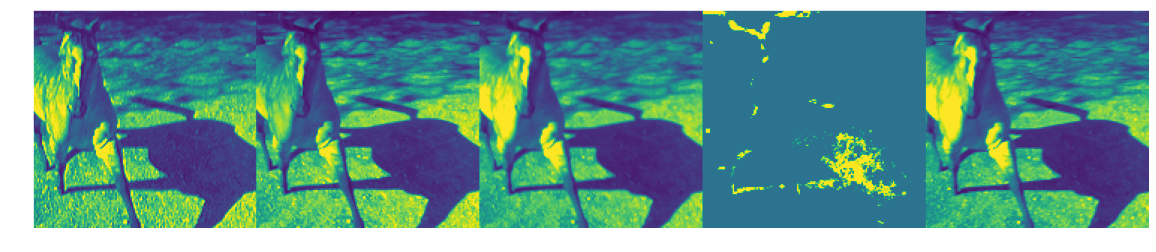

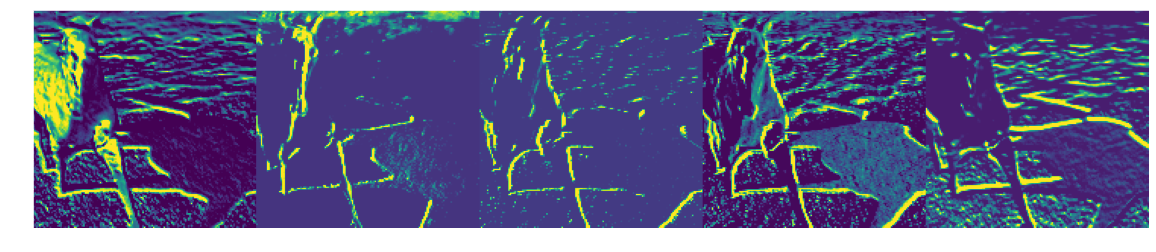

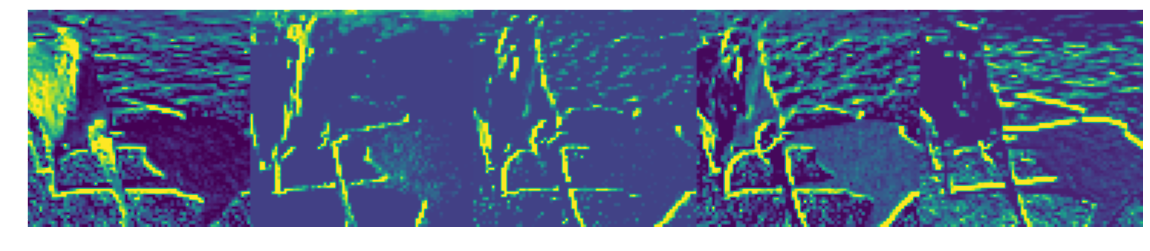

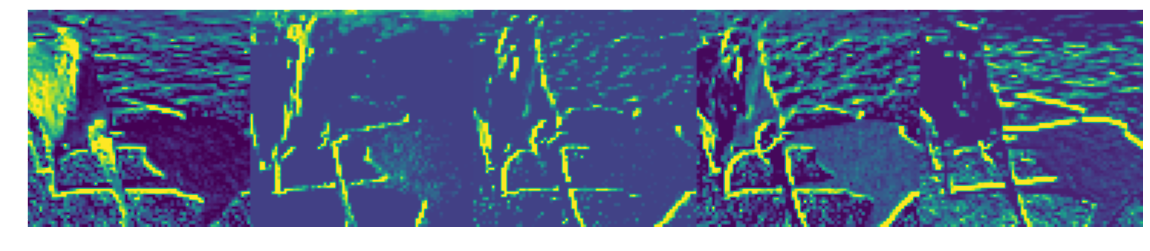

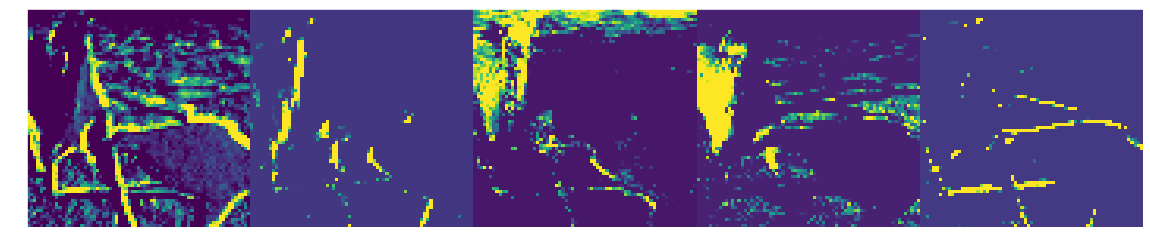

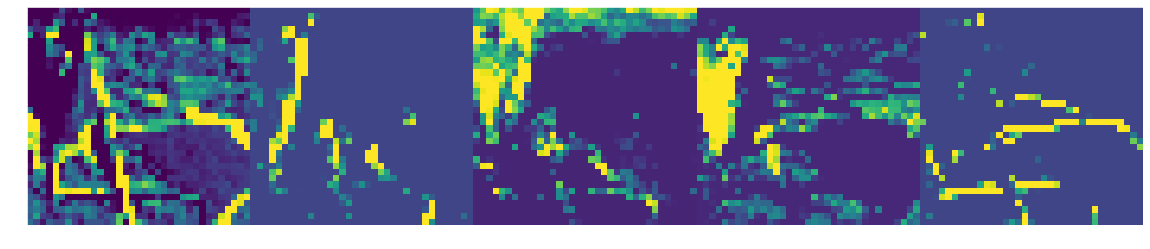

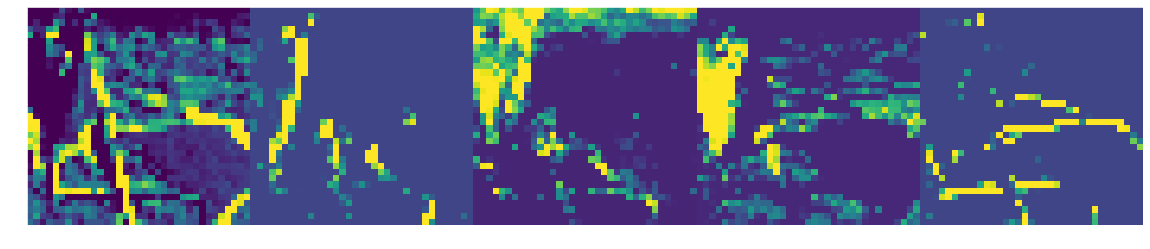

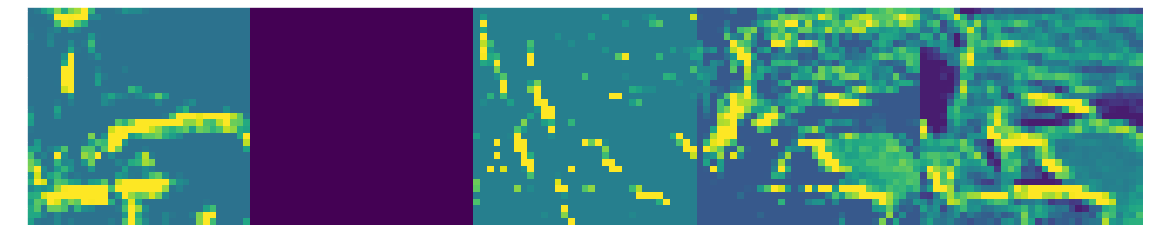

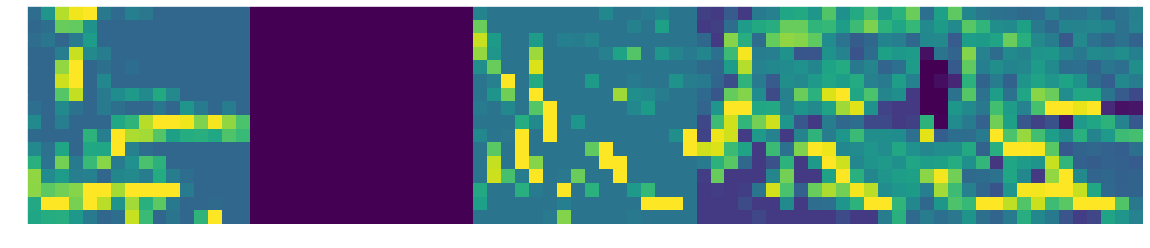

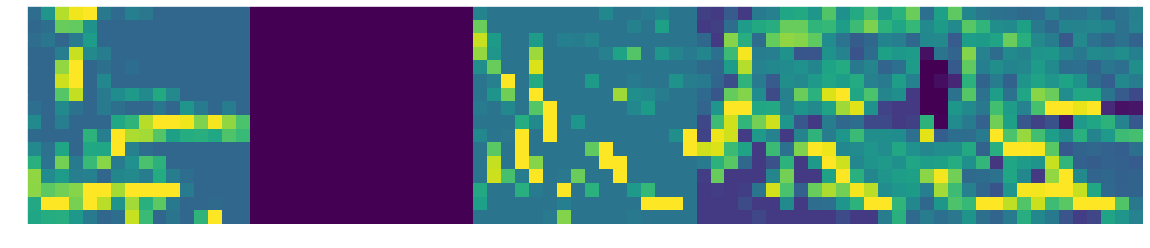

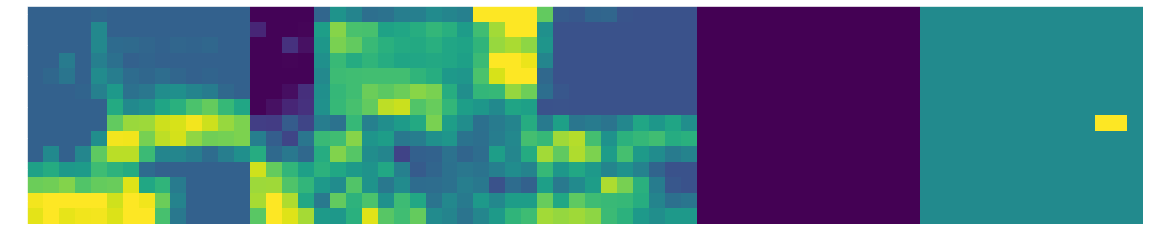

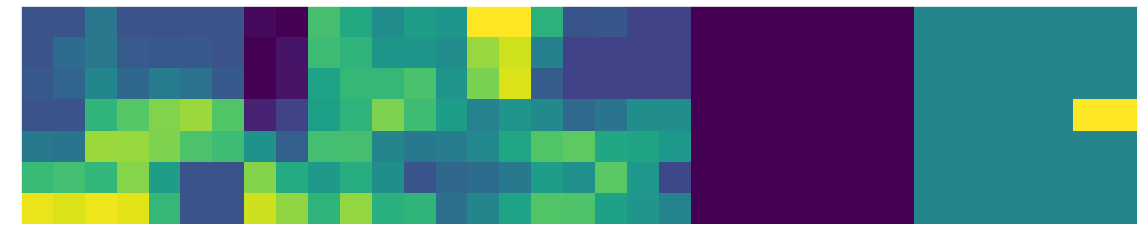

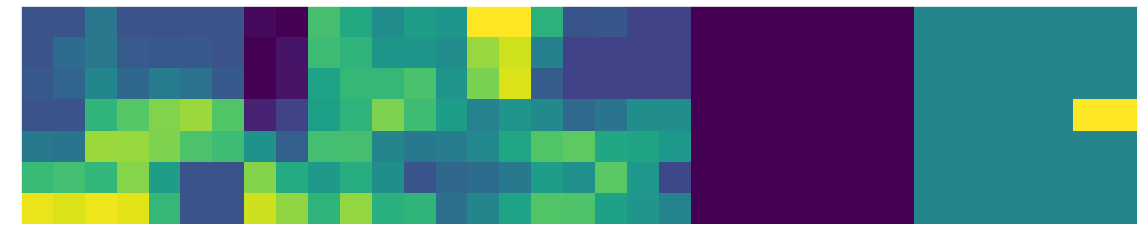

In [11]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
# img_path = human_img_files[0]

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [12]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)
print('End program reached')

End program reached
